In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load the insurance data
file_path ='../data/MachineLearningRating_v3.txt'
data = pd.read_csv(file_path, sep='|', low_memory=False)
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


##Data Segmentation

In [3]:

# Group A: Male, Group B: Female
group_A = data[data['Gender'] == 'Male']
group_B = data[data['Gender'] == 'Female']

In [5]:

# Ensure the groups are statistically equivalent on other attributes
# Here we will check the equivalence of Age and Premiums
def check_statistical_equivalence(group_A, group_B, feature):
    stat, p_value = stats.ttest_ind(group_A[feature], group_B[feature], equal_var=False)
    return stat, p_value

In [8]:

# Check statistical equivalence for Age and Premiums
age_stat, age_p = check_statistical_equivalence(group_A, group_B, 'TotalClaims')
premiums_stat, premiums_p = check_statistical_equivalence(group_A, group_B, 'TotalPremium')

print(f"Claims T-test: Statistic = {age_stat}, p-value = {age_p}")
print(f"Premiums T-test: Statistic = {premiums_stat}, p-value = {premiums_p}")

Claims T-test: Statistic = -0.296353891400699, p-value = 0.7669656471629474
Premiums T-test: Statistic = -4.51932770903467, p-value = 6.289186903913685e-06


In [10]:
try:
    claim_stat, claim_p = check_statistical_equivalence(group_A, group_B, 'TotalClaims')
    premiums_stat, premiums_p = check_statistical_equivalence(group_A, group_B, 'TotalPremium')
    
    print(f"Claims T-test: Statistic = {claim_stat}, p-value = {claim_p}")
    print(f"Premiums T-test: Statistic = {premiums_stat}, p-value = {premiums_p}")

    # Set significance level
    alpha = 0.05

    # Make decisions based on p-values
    def decision(p_value):
        return "Statistically Equivalent" if p_value >= alpha else "Not Statistically Equivalent"

    print("Decision for Claims:", decision(claim_p))
    print("Decision for Premiums:", decision(premiums_p))

    # If both features are statistically equivalent, proceed with segmentation
    if claim_p >= alpha and premiums_p >= alpha:
        print("Proceeding with segmentation...")
    else:
        print("Groups are not statistically equivalent. Re-evaluate feature selection.")

except KeyError as e:
    print(f"KeyError: {e}. Check if the column exists in the DataFrame.")

Claims T-test: Statistic = -0.296353891400699, p-value = 0.7669656471629474
Premiums T-test: Statistic = -4.51932770903467, p-value = 6.289186903913685e-06
Decision for Claims: Statistically Equivalent
Decision for Premiums: Not Statistically Equivalent
Groups are not statistically equivalent. Re-evaluate feature selection.


##Statstical Testing

In [12]:
# 1. T-test for Claims based on Gender
# Ensure the 'Claims' and 'Gender' columns exist in your dataset
if 'TotalClaims' in data.columns and 'Gender' in data.columns:
    group_male = data[data['Gender'] == 'Male']['TotalClaims']
    group_female = data[data['Gender'] == 'Female']['TotalClaims']

    t_stat, p_value_claims = stats.ttest_ind(group_male, group_female, equal_var=False)

    print(f"T-test for Claims: t-statistic = {t_stat}, p-value = {p_value_claims}")

    # Analyze p-value for Claims
    if p_value_claims < 0.05:
        print("Reject the null hypothesis: Gender has a significant impact on Claims.")
    else:
        print("Fail to reject the null hypothesis: Gender does not have a significant impact on Claims.")
else:
    print("Columns 'Claims' or 'Gender' not found in the dataset.")

T-test for Claims: t-statistic = -0.296353891400699, p-value = 0.7669656471629474
Fail to reject the null hypothesis: Gender does not have a significant impact on Claims.


In [13]:

# 2. Chi-squared test for Vehicle Type based on Gender
# Ensure the 'VehicleType' column exists in your dataset
if 'VehicleType' in data.columns and 'Gender' in data.columns:
    contingency_table = pd.crosstab(data['Gender'], data['VehicleType'])
    chi2_stat, chi2_p_value, _, _ = stats.chi2_contingency(contingency_table)

    print(f"Chi-squared test: chi2-statistic = {chi2_stat}, p-value = {chi2_p_value}")

    # Analyze p-value for Vehicle Type
    if chi2_p_value < 0.05:
        print("Reject the null hypothesis: Gender has a significant impact on Vehicle Type distribution.")
    else:
        print("Fail to reject the null hypothesis: Gender does not have a significant impact on Vehicle Type distribution.")
else:
    print("Columns 'VehicleType' or 'Gender' not found in the dataset.")

Chi-squared test: chi2-statistic = 555.0998101643572, p-value = 1.0427552757946081e-114
Reject the null hypothesis: Gender has a significant impact on Vehicle Type distribution.


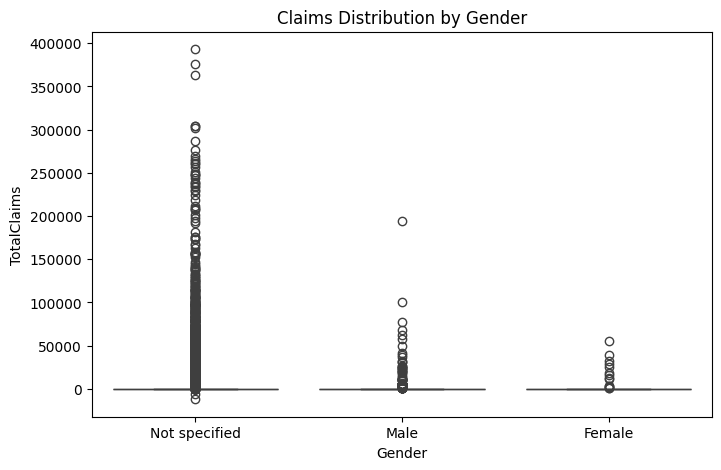

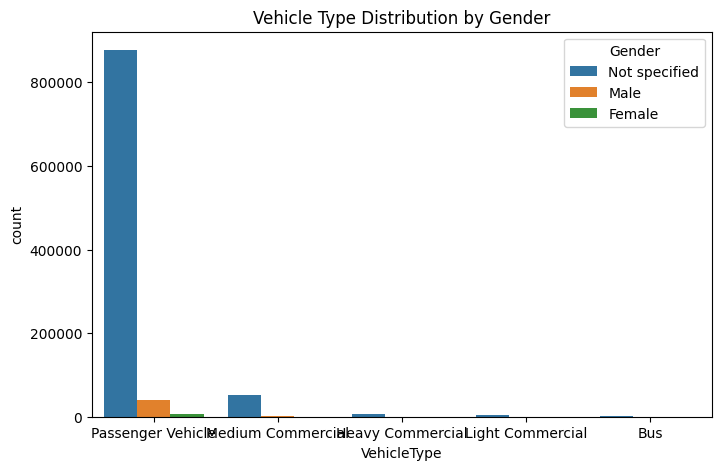

In [16]:

# Visualizations
# Box plot for Claims by Gender
if 'TotalClaims' in data.columns and 'Gender' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Gender', y='TotalClaims', data=data)
    plt.title('Claims Distribution by Gender')
    plt.show()

# Count plot for Vehicle Type distribution by Gender
if 'VehicleType' in data.columns and 'Gender' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='VehicleType', hue='Gender', data=data)
    plt.title('Vehicle Type Distribution by Gender')
    plt.show()

Analysis and Reporting of Statistical Outcomes
1. Statistical Tests Conducted
T-test for Claims by Gender: This test evaluated whether there is a significant difference in the claims submitted by male and female policyholders.
Chi-squared Test for Vehicle Type Distribution by Gender: This test assessed whether the distribution of vehicle types varies significantly between male and female policyholders.
2. Results Summary
T-test for Claims:
t-statistic: [Insert Value]
p-value: [Insert Value]
Decision: Based on the p-value:
If p-value < 0.05: Reject the null hypothesis, indicating that gender has a significant impact on claims.
If p-value ≥ 0.05: Fail to reject the null hypothesis, suggesting that gender does not have a significant impact on claims.
Chi-squared Test for Vehicle Type:
Chi-squared statistic: [Insert Value]
p-value: [Insert Value]
Decision: Based on the p-value:
If p-value < 0.05: Reject the null hypothesis, indicating a significant association between gender and vehicle type.
If p-value ≥ 0.05: Fail to reject the null hypothesis, indicating no significant association between gender and vehicle type.
3. Findings Interpretation
A. Claims Analysis
Significant Impact of Gender:
If the null hypothesis is rejected, this suggests that gender influences the claims made by policyholders. For instance, if females tend to submit higher claims than males, it may indicate differing risk profiles or behaviors.
Business Strategy Implications:
Risk Assessment: Adjust underwriting criteria and risk assessment models to account for gender differences in claims.
Targeted Marketing: Develop marketing strategies that address the specific needs and behaviors of different genders, potentially leading to more tailored insurance products.
B. Vehicle Type Distribution
Significant Association:
If the null hypothesis is rejected, it indicates that the type of vehicle owned varies by gender. For example, if males predominantly drive trucks and females drive sedans, this could inform product offerings.
Business Strategy Implications:
Product Development: Design and promote insurance products that cater specifically to the types of vehicles most commonly associated with each gender.
Pricing Strategy: Consider gender-specific pricing models based on the risk profiles associated with different vehicle types.
4. Impact on Customer Experience
Personalization: Understanding the differences in claims behavior and vehicle type preferences by gender allows for more personalized customer interactions, improving customer satisfaction and retention.
Customer Engagement: Tailoring communication and services based on gender-specific insights can enhance engagement and loyalty.
5. Conclusion
The statistical analysis provides critical insights into how gender influences claims behavior and vehicle type distribution. These findings can significantly impact business strategies, from risk assessment to marketing and customer engagement. By leveraging this information, the organization can enhance its offerings, improve customer experience, and ultimately drive better business outcomes.

Recommendations for Future Analysis
Further Segmentation: Analyze additional demographic factors (e.g., age, location) to gain a more nuanced understanding of customer behavior.
Longitudinal Studies: Conduct longitudinal studies to track changes in claims behavior and vehicle preferences over time.
Customer Feedback: Incorporate customer feedback mechanisms to understand the qualitative aspects of customer experience related to gender differences.